<a href="https://colab.research.google.com/github/Santhosh-1801/DL/blob/main/TextClassificationusingBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [4]:
bert_preprocess_model=hub.KerasLayer(preprocess_url)

In [5]:
testing_text=['nice movie','i love python programming']
text_preprocessed=bert_preprocess_model(testing_text)

In [6]:
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [7]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [8]:
bert_model=hub.KerasLayer(encoder_url)
bert_results=bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['default', 'encoder_outputs', 'sequence_output', 'pooled_output'])

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [11]:
#Reading a CSV File
import pandas as pd
df=pd.read_csv('/content/sample_data/spam.csv')

In [12]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [14]:
df_spam=df[df['Category']=='spam']
df_ham=df[df['Category']=='ham']

In [15]:
df_spam.shape

(747, 2)

In [16]:
df_ham.shape

(4825, 2)

In [17]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [18]:
df_balanced=pd.concat([df_spam,df_ham_downsampled])

In [19]:
df_balanced.shape

(1494, 2)

In [20]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [21]:
df_balanced.sample(10)

,Category,Message,spam
3432,ham,Yeah if we do have to get a random dude we nee...,0
1673,spam,URGENT! We are trying to contact U. Todays dra...,1
5269,spam,"If you don't, your prize will go to another cu...",1
299,ham,I cant pick the phone right now. Pls send a me...,0
3164,spam,This is the 2nd time we have tried to contact ...,1
1047,ham,"Do 1 thing! Change that sentence into: ""Becaus...",0
2071,spam,Sexy Singles are waiting for you! Text your AG...,1
4162,spam,Had your mobile 11 months or more? U R entitle...,1
1472,ham,Oh. U must have taken your REAL Valentine out ...,0
4475,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [23]:
X_train

2250    Thanks for your ringtone order, ref number R83...
4120    Hiya do u like the hlday pics looked horrible ...
3010    Update_Now - 12Mths Half Price Orange line ren...
1988                     No calls..messages..missed calls
1466    YOU 07801543489 are guaranteed the latests Nok...
                              ...                        
3557                         Ok lor. I'm in town now lei.
5462    Txt: CALL to No: 86888 & claim your reward of ...
2863    Adult 18 Content Your video will be with you s...
3778    Mila, age23, blonde, new in UK. I look sex wit...
2180        And popping &lt;#&gt; ibuprofens was no help.
Name: Message, Length: 1120, dtype: object

In [24]:
X_test

720     Macha dont feel upset.i can assume your mindse...
5305    Hi missed your Call and my mumHas beendropping...
3222    Thanks for your ringtone order, reference numb...
3751    Buzz! Hey, my Love ! I think of you and hope y...
5342    u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...
                              ...                        
5481                      Shall call now dear having food
3409    Do you want a New Nokia 3510i colour phone Del...
2267    <Forwarded from 88877>FREE entry into our £250...
2328    URGENT! Your mobile number *************** WON...
4677                              Ü ready then call me...
Name: Message, Length: 374, dtype: object

In [25]:
y_train

2250    1
4120    0
3010    1
1988    0
1466    1
       ..
3557    0
5462    1
2863    1
3778    1
2180    0
Name: spam, Length: 1120, dtype: int64

In [26]:
y_test

720     0
5305    0
3222    1
3751    0
5342    1
       ..
5481    0
3409    1
2267    1
2328    1
4677    0
Name: spam, Length: 374, dtype: int64

In [27]:
preprocess_url=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_url=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [36]:
def get_sentence_embedding(sentences):
  preprocessed_text=preprocess_url(sentences)
  return encoder_url(preprocessed_text)['pooled_output']

get_sentence_embedding([
    "500$ discount, hurry up MASS offer",
    "Bhavin, please consider this meeting urgent"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.6316977 , -0.35176384, -0.6562075 , ..., -0.45946532,
        -0.67826504,  0.7857503 ],
       [-0.9136817 , -0.564072  , -0.9566977 , ..., -0.85375315,
        -0.7526522 ,  0.88205135]], dtype=float32)>

In [37]:
e=get_sentence_embedding(['banana','grapes','mango','jeff bezos','elon musk','bill gates'])

In [38]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606919 , -0.14219381,  0.4960461 , ...,  0.42165333,
        -0.532214  ,  0.80312175],
       [-0.86023223, -0.21242939,  0.4915689 , ...,  0.3979803 ,
        -0.60506296,  0.8447167 ],
       [-0.7128864 , -0.15463923,  0.38401636, ...,  0.352787  ,
        -0.5099134 ,  0.73474115],
       [-0.8253345 , -0.3555054 , -0.5906963 , ..., -0.01613662,
        -0.6141756 ,  0.87230295],
       [-0.7504134 , -0.26812598, -0.26689604, ...,  0.02839445,
        -0.5938098 ,  0.79749876],
       [-0.78544384, -0.299497  ,  0.41027427, ...,  0.5222542 ,
        -0.4957355 ,  0.81507534]], dtype=float32)>

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [42]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=preprocess_url(text_input)
outputs=encoder_url(preprocessed_text)

l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [46]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)


In [47]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 546s 15s/step - loss: 0.6857 - accuracy: 0.5786 - precision: 0.5780 - recall: 0.5821
Epoch 2/10
35/35 [==============================] - 526s 15s/step - loss: 0.5358 - accuracy: 0.7866 - precision: 0.7934 - recall: 0.7750
Epoch 3/10
35/35 [==============================] - 537s 15s/step - loss: 0.4692 - accuracy: 0.8241 - precision: 0.8259 - recall: 0.8214
Epoch 4/10
35/35 [==============================] - 533s 15s/step - loss: 0.4127 - accuracy: 0.8545 - precision: 0.8336 - recall: 0.8857
Epoch 5/10
35/35 [==============================] - 524s 15s/step - loss: 0.3799 - accuracy: 0.8661 - precision: 0.8510 - recall: 0.8875
Epoch 6/10
35/35 [==============================] - 521s 15s/step - loss: 0.3540 - accuracy: 0.8902 - precision: 0.8827 - recall: 0.9000
Epoch 7/10
35/35 [==============================] - 523s 15s/step - loss: 0.3302 - accuracy: 0.8911 - precision: 0.8842 - recall: 0.9000
Epoch 8/10
35/35 [=======================

In [49]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 197s 16s/step - loss: 0.2616 - accuracy: 0.9198 - precision: 0.9067 - recall: 0.9358


[0.2615632712841034,
 0.9197860956192017,
 0.9067357778549194,
 0.9358288645744324]

In [50]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 188s 15s/step


In [51]:
import numpy as np

y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted


array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predicted)
cm

array([[169,  18],
       [ 12, 175]])

Text(50.722222222222214, 0.5, 'Truth')

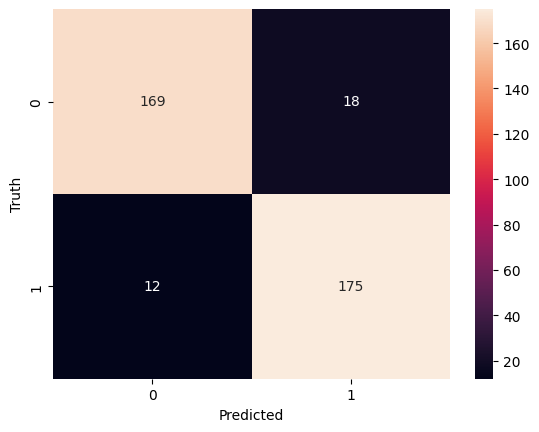

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       187
           1       0.91      0.94      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [55]:
reviews=[
    'Enter a chance to win $5000,hurry up,offer valid until tomorrow 31 may 2023',
    'Hey Sam,Please forward the mail faster to get validation from clients',
    'You are awarded with MASK which contains voucher of $300000,please buy it faster',
]

In [56]:
model.predict(reviews)

1/1 [==============================] - 6s 6s/step


array([[0.8595223 ],
       [0.45661116],
       [0.5894957 ]], dtype=float32)